<a href="https://colab.research.google.com/github/daisydq74/MATH-4803-4210/blob/MNIST-project/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
import seaborn as sn

In [ ]:
mnist = tf.keras.datasets.mnist
(X_train_origin, y_train), (X_test_origin, y_test) = mnist.load_data()
print(X_train_origin.shape)
print(X_test_origin.shape)

11490434/11490434 [==============================] - 2s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [ ]:
flatten_train_X = X_train_origin.reshape((X_train_origin.shape[0], 784))
flatten_test_X = X_test_origin.reshape((X_test_origin.shape[0], 784))
print(flatten_train_X.shape)
'''
count = 0
for k in range(10000):
  for i in range(28):
    for j in range(28):
      if test_X[k][i][j] != flatten_test_X[k][28 * i + j]:
        count += 1
print(count)
''' # test flatten
#standardized_data = StandardScaler().fit_transform(mnist)
#print(standardized_data.shape)

(60000, 784)


'\ncount = 0\nfor k in range(10000):\n  for i in range(28):\n    for j in range(28):\n      if test_X[k][i][j] != flatten_test_X[k][28 * i + j]:\n        count += 1\nprint(count)\n'

##PCA

In [ ]:

#x_train is flattened, train_x is non-flattened
scaler = StandardScaler()
X_train = scaler.fit_transform(flatten_train_X)
X_test = scaler.transform(flatten_test_X)


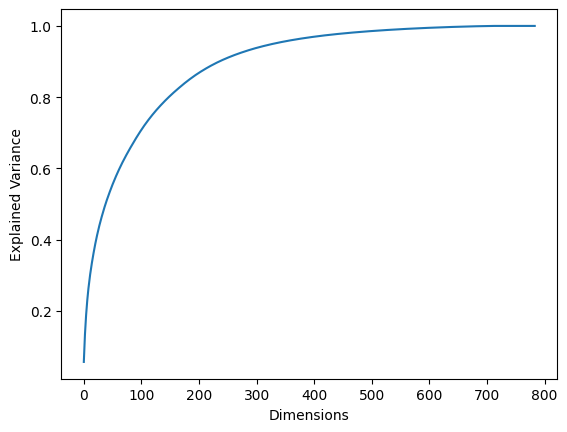

In [ ]:

pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

cum_sum = np.cumsum(pca.explained_variance_ratio_)
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')
plt.plot(cum_sum)

In [ ]:
n_components = np.argmax(cum_sum >= 0.95) + 1
print("Number of components that capture 95% of the variance:", n_components)

Number of components that capture 95% of the variance: 331


In [ ]:
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

##Logistic Regression

(1)With PCA

In [ ]:
clf = LogisticRegression(max_iter = 1000)
clf.fit(X_train_pca, y_train)
predictions = clf.predict(X_test_pca)
score = clf.score(X_test_pca, y_test)
print(f"Accuracy: {score:.6f}")


Accuracy: 0.921100


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.95      0.98      0.97      1135
           2       0.91      0.89      0.90      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.93      0.93       982
           5       0.89      0.87      0.88       892
           6       0.94      0.95      0.94       958
           7       0.93      0.92      0.92      1028
           8       0.87      0.88      0.88       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



Counter({1: 1135, 2: 1032, 7: 1028, 3: 1010, 9: 1009, 4: 982, 0: 980, 8: 974, 6: 958, 5: 892})
Counter({1: 1161, 3: 1020, 9: 1014, 7: 1011, 2: 1002, 0: 1001, 8: 983, 4: 974, 6: 965, 5: 869})


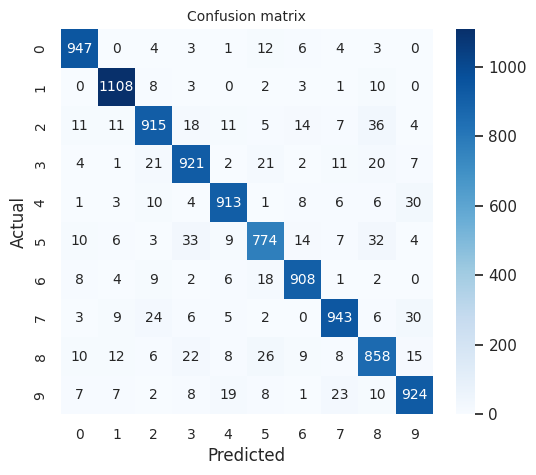

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(Counter(y_test))
print(Counter(predictions))
plt.figure(figsize = (6,5))
conf_mx = metrics.confusion_matrix(y_test, predictions)

heat_cm = pd.DataFrame(conf_mx)
heat_cm.index.name = 'Actual'
heat_cm.columns.name = 'Predicted'
plt.title('Confusion matrix', fontsize = 10)
plt.xticks(np.arange(4), fontsize = 10)
plt.yticks(np.arange(4), fontsize = 10)


sn.set(font_scale=1) # For label size
sn.heatmap(heat_cm, cmap="Blues", annot=True, annot_kws={"size": 10},fmt='g')# font size
plt.savefig('train confusion matrix.png')
plt.show()

(2) Without PCA

In [ ]:
clf.fit(X_train, y_train)
predictions2 = clf.predict(X_test)
score = clf.score(X_test, y_test)
print(f"Accuracy: {score:.6f}")

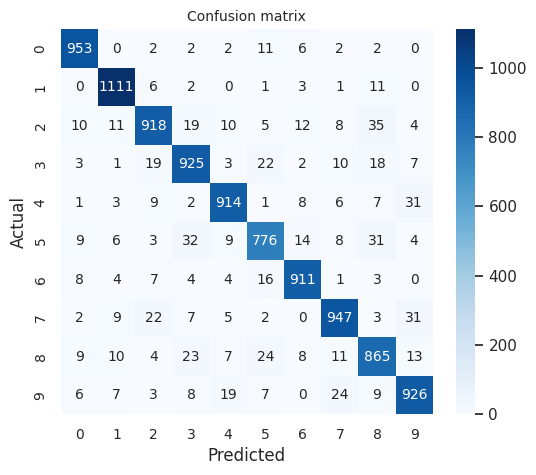

In [ ]:
cm = metrics.confusion_matrix(y_test, predictions2)
plt.figure(figsize = (6,5))
conf_mx = metrics.confusion_matrix(y_test, predictions2)

heat_cm = pd.DataFrame(conf_mx)
heat_cm.index.name = 'Actual'
heat_cm.columns.name = 'Predicted'
plt.title('Confusion matrix', fontsize = 10)
plt.xticks(np.arange(4), fontsize = 10)
plt.yticks(np.arange(4), fontsize = 10)


sn.set(font_scale=1) # For label size
sn.heatmap(heat_cm, cmap="Blues", annot=True, annot_kws={"size": 10},fmt='g')# font size
plt.savefig('train confusion matrix.png')
plt.show()

CNN Tensorflow

In [ ]:
# Normalize pixel values to be between 0 and 1
X_train_normal, X_test_normal = X_train_origin / 255.0, X_test_origin / 255.0
# construct model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10))

model.summary()

In [ ]:
# execute
model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 2)

model.fit(X_train_normal, y_train, epochs = 20, validation_split = 0.2, callbacks = [callback])

Epoch 1/20
1500/1500 [==============================] - 18s 5ms/step - loss: 0.6350 - accuracy: 0.8160 - val_loss: 0.1987 - val_accuracy: 0.9417
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1574 - accuracy: 0.9514 - val_loss: 0.1183 - val_accuracy: 0.9648
Epoch 3/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1087 - accuracy: 0.9663 - val_loss: 0.0948 - val_accuracy: 0.9709
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0848 - accuracy: 0.9727 - val_loss: 0.0799 - val_accuracy: 0.9768
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0724 - accuracy: 0.9772 - val_loss: 0.0759 - val_accuracy: 0.9760
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0628 - accuracy: 0.9802 - val_loss: 0.0662 - val_accuracy: 0.9800
Epoch 7/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0556 - accuracy: 0.9824 - val_loss: 0.0662 - val_accuracy

result

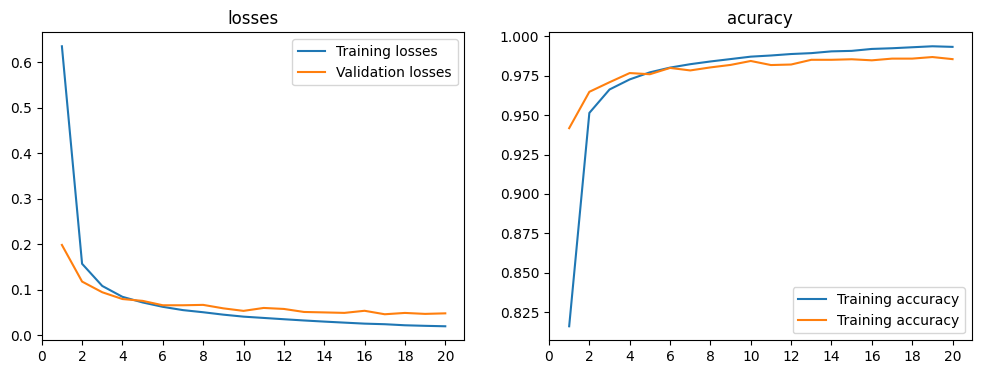

313/313 - 2s - loss: 0.0337 - accuracy: 0.9882 - 2s/epoch - 5ms/step
TEST ACCURACY WITH Optimizer SGD IS
0.9882000088691711


In [ ]:
history = model.history.history

epochs = len(history['loss'])
plt.rcParams['figure.figsize'] = [12, 4]
plt.subplot(121)
plt.plot(range(1, epochs + 1), history['loss'], label = 'Training losses')
plt.plot(range(1, epochs + 1), history['val_loss'], label = 'Validation losses')
plt.title('losses')
plt.legend(loc = 'best')
plt.xticks(range(0, epochs + 2, 2))

plt.subplot(122)
plt.plot(range(1, epochs + 1), history['accuracy'], label = 'Training accuracy')
plt.plot(range(1, epochs + 1), history['val_accuracy'], label = 'Training accuracy')
plt.title('acuracy')
plt.legend(loc = 'best')
plt.xticks(range(0, epochs + 2, 2))

plt.show()

test_loss, test_acc = model.evaluate(X_test_normal, y_test, verbose = 2)
print("TEST ACCURACY WITH Optimizer SGD IS")
print(test_acc)

In [ ]:
X_train_normal, X_test_normal = X_train_pca.reshape((60000,28,28)), X_test_pca.reshape((10000,28,28))

In [ ]:
# execute
model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 2)

model.fit(X_train_normal, y_train, epochs = 20, validation_split = 0.2, callbacks = [callback])

Epoch 1/20
1500/1500 [==============================] - 8s 5ms/step - loss: 1.6437 - accuracy: 0.4477 - val_loss: 0.8573 - val_accuracy: 0.7373
Epoch 2/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.6367 - accuracy: 0.8046 - val_loss: 0.4556 - val_accuracy: 0.8672
Epoch 3/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4096 - accuracy: 0.8744 - val_loss: 0.3603 - val_accuracy: 0.8923
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3279 - accuracy: 0.9006 - val_loss: 0.3134 - val_accuracy: 0.9063
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2760 - accuracy: 0.9167 - val_loss: 0.2890 - val_accuracy: 0.9168
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2430 - accuracy: 0.9245 - val_loss: 0.2875 - val_accuracy: 0.9184
Epoch 7/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2159 - accuracy: 0.9334 - val_loss: 0.2610 - val_accuracy:

In [ ]:
history = model.history.history

epochs = len(history['loss'])
plt.rcParams['figure.figsize'] = [12, 4]
plt.subplot(121)
plt.plot(range(1, epochs + 1), history['loss'], label = 'Training losses')
plt.plot(range(1, epochs + 1), history['val_loss'], label = 'Validation losses')
plt.title('losses with pca')
plt.legend(loc = 'best')
plt.xticks(range(0, epochs + 2, 2))

plt.subplot(122)
plt.plot(range(1, epochs + 1), history['accuracy'], label = 'Training accuracy')
plt.plot(range(1, epochs + 1), history['val_accuracy'], label = 'Training accuracy')
plt.title('acuracy with pca')
plt.legend(loc = 'best')
plt.xticks(range(0, epochs + 2, 2))

plt.show()

test_loss, test_acc = model.evaluate(X_test_normal, y_test, verbose = 2)
print("TEST ACCURACY WITH Optimizer SGD IS")
print(test_acc)

## Random Forest

(1) With PCA

In [ ]:
rf_pca = RandomForestClassifier(n_estimators=100)
rf_pca.fit(X_train_pca, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf_pca = rf_pca.predict(X_test_pca)
rf_score_pca = rf_pca.score(X_test_pca, y_test)
print(f"Accuracy: {rf_score_pca:.6f}")

Accuracy: 0.937100


Counter({1: 1135, 2: 1032, 7: 1028, 3: 1010, 9: 1009, 4: 982, 0: 980, 8: 974, 6: 958, 5: 892})
Counter({1: 1130, 3: 1066, 2: 1027, 7: 1016, 0: 1013, 4: 1007, 9: 975, 6: 960, 8: 941, 5: 865})


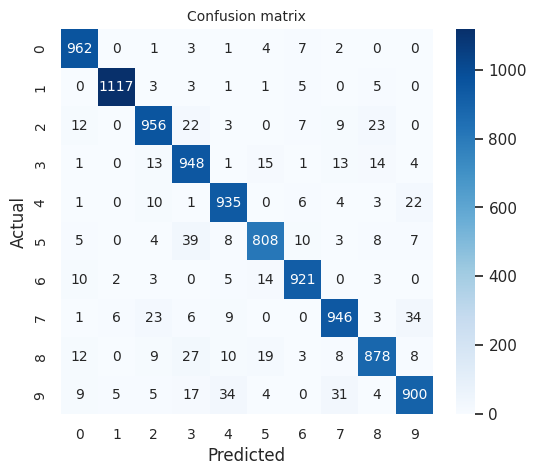

In [ ]:
print(Counter(y_test))
print(Counter(y_pred_rf_pca))
plt.figure(figsize = (6,5))
conf_mx = metrics.confusion_matrix(y_test, y_pred_rf_pca)

heat_cm = pd.DataFrame(conf_mx)
heat_cm.index.name = 'Actual'
heat_cm.columns.name = 'Predicted'
plt.title('Confusion matrix', fontsize = 10)
plt.xticks(np.arange(4), fontsize = 10)
plt.yticks(np.arange(4), rotation = 90, fontsize = 10)


sn.set(font_scale=1) # For label size
sn.heatmap(heat_cm, cmap="Blues", annot=True, annot_kws={"size": 10},fmt='g')# font size
plt.savefig('train confusion matrix.png')
plt.show()

(2) Without PCA

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf = rf.predict(X_test)
rf_score = rf.score(X_test, y_test)
print(f"Accuracy: {rf_score:.6f}")

Accuracy: 0.966000


Counter({1: 1135, 2: 1032, 7: 1028, 3: 1010, 9: 1009, 4: 982, 0: 980, 8: 974, 6: 958, 5: 892})
Counter({1: 1134, 2: 1042, 3: 1014, 7: 1013, 9: 998, 0: 996, 4: 989, 8: 970, 6: 962, 5: 882})


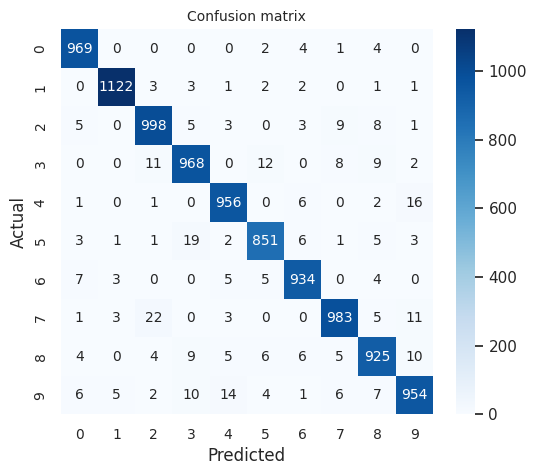

In [ ]:
print(Counter(y_test))
print(Counter(y_pred_rf))
plt.figure(figsize = (6,5))
conf_mx = metrics.confusion_matrix(y_test, y_pred_rf)

heat_cm = pd.DataFrame(conf_mx)
heat_cm.index.name = 'Actual'
heat_cm.columns.name = 'Predicted'
plt.title('Confusion matrix', fontsize = 10)
plt.xticks(np.arange(4), fontsize = 10)
plt.yticks(np.arange(4), fontsize = 10)


sn.set(font_scale=1) # For label size
sn.heatmap(heat_cm, cmap="Blues", annot=True, annot_kws={"size": 10},fmt='g')# font size
plt.savefig('train confusion matrix.png')
plt.show()

## SVM

(1) With PCA

In [ ]:
SVC_pca = SVC()
SVC_pca.fit(X_train_pca, y_train)

SVC()

In [ ]:
y_pred_SVC_pca = SVC_pca.predict(X_test_pca)
SVC_score_pca = SVC_pca.score(X_test_pca, y_test)
print(f"Accuracy: {SVC_score_pca:.6f}")

Accuracy: 0.968300


Counter({1: 1135, 2: 1032, 7: 1028, 3: 1010, 9: 1009, 4: 982, 0: 980, 8: 974, 6: 958, 5: 892})
Counter({1: 1142, 7: 1063, 2: 1038, 3: 1013, 0: 988, 9: 977, 4: 973, 8: 965, 6: 949, 5: 892})


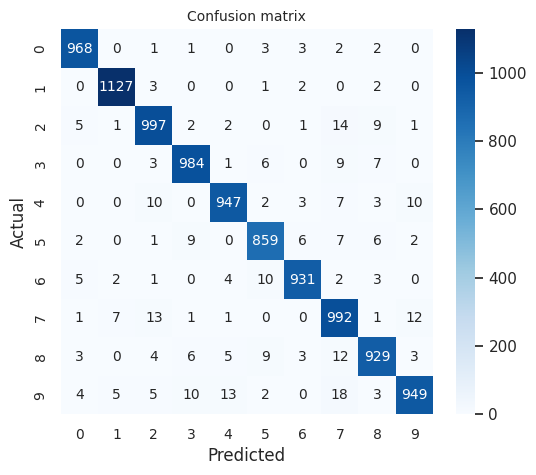

In [ ]:
print(Counter(y_test))
print(Counter(y_pred_SVC_pca))
plt.figure(figsize = (6,5))
conf_mx = metrics.confusion_matrix(y_test, y_pred_SVC_pca)

heat_cm = pd.DataFrame(conf_mx)
heat_cm.index.name = 'Actual'
heat_cm.columns.name = 'Predicted'
plt.title('Confusion matrix', fontsize = 10)
plt.xticks(np.arange(4), fontsize = 10)
plt.yticks(np.arange(4), rotation = 90, fontsize = 10)


sn.set(font_scale=1) # For label size
sn.heatmap(heat_cm, cmap="Blues", annot=True, annot_kws={"size": 10},fmt='g')# font size
plt.savefig('train confusion matrix.png')
plt.show()

(2) Without PCA

In [ ]:
SVC = SVC()
SVC.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_SVC = SVC.predict(X_test)
SVC_score = SVC.score(X_test, y_test)
print(f"Accuracy: {SVC_score:.6f}")

Accuracy: 0.966000


Counter({1: 1135, 2: 1032, 7: 1028, 3: 1010, 9: 1009, 4: 982, 0: 980, 8: 974, 6: 958, 5: 892})
Counter({1: 1142, 7: 1070, 2: 1040, 3: 1011, 0: 989, 9: 975, 4: 974, 8: 964, 6: 949, 5: 886})


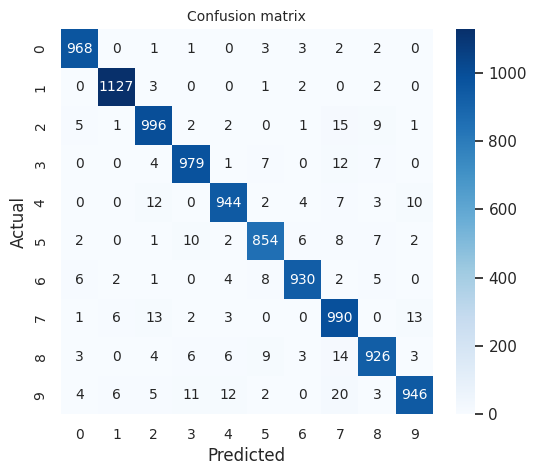

In [ ]:
print(Counter(y_test))
print(Counter(y_pred_SVC))
plt.figure(figsize = (6,5))
conf_mx = metrics.confusion_matrix(y_test, y_pred_SVC)

heat_cm = pd.DataFrame(conf_mx)
heat_cm.index.name = 'Actual'
heat_cm.columns.name = 'Predicted'
plt.title('Confusion matrix', fontsize = 10)
plt.xticks(np.arange(4), fontsize = 10)
plt.yticks(np.arange(4), rotation = 90, fontsize = 10)


sn.set(font_scale=1) # For label size
sn.heatmap(heat_cm, cmap="Blues", annot=True, annot_kws={"size": 10},fmt='g')# font size
plt.savefig('train confusion matrix.png')
plt.show()

# K Means

In [ ]:
X_train_nor = X_train_origin.reshape(len(X_train_origin),-1).astype(float) / 255.
X_test_nor = X_test_origin.reshape(len(X_test_origin),-1).astype(float) / 255.

Build the model:

In [ ]:
n = len(np.unique(y_test))
k_means = MiniBatchKMeans(n_clusters = n)
k_means.fit(X_train_nor)
k_means.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([7, 6, 5, ..., 5, 1, 4], dtype=int32)

In [ ]:
def infer_cluster_labels(k_means, actual_labels):

    inferred_labels = {}

    for i in range(k_means.n_clusters):

        labels = []
        index = np.where(k_means.labels_ == i)
        labels.append(actual_labels[index])

        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        if np.argmax(counts) in inferred_labels:
            inferred_labels[np.argmax(counts)].append(i)
        else:
            inferred_labels[np.argmax(counts)] = [i]

    return inferred_labels

def infer_data_labels(X_labels, cluster_labels):

    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)

    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key

    return predicted_labels

Accuracy:

In [ ]:
cluster_num = [10, 20, 50, 100, 200, 500]
accuracy = []

import warnings
warnings.filterwarnings("ignore")

for i in range(5, 200):
  k_means = MiniBatchKMeans(n_clusters = i)
  k_means.fit(X_train_nor)
  cluster_labels = infer_cluster_labels(k_means, y_train)
  y_predicted = infer_data_labels(k_means.labels_, cluster_labels)
  accuracy.append(metrics.accuracy_score(y_train, y_predicted))
  #print('Number of Clusters: {}'.format(k_means.n_clusters))
  #print('Accuracy: {}\n'.format(metrics.accuracy_score(y_train, y_predicted)))
plt.plot(range(5, 200), accuracy, color ='g', linewidth ='3')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show() # clear the plot

Test on 20 clusters

In [ ]:
total_clusters = len(np.unique(y_test))
k_means = MiniBatchKMeans(n_clusters = 20)
k_means.fit(X_test_nor)
cluster_labels = infer_cluster_labels(k_means, y_test)

test_clusters = k_means.predict(X_test_nor)
predicted_labels = infer_data_labels(k_means.predict(X_test_nor), cluster_labels)
print('Accuracy: {}\n'.format(metrics.accuracy_score(y_test, predicted_labels)))

Accuracy: 0.6919



Display representative figures of each cluster

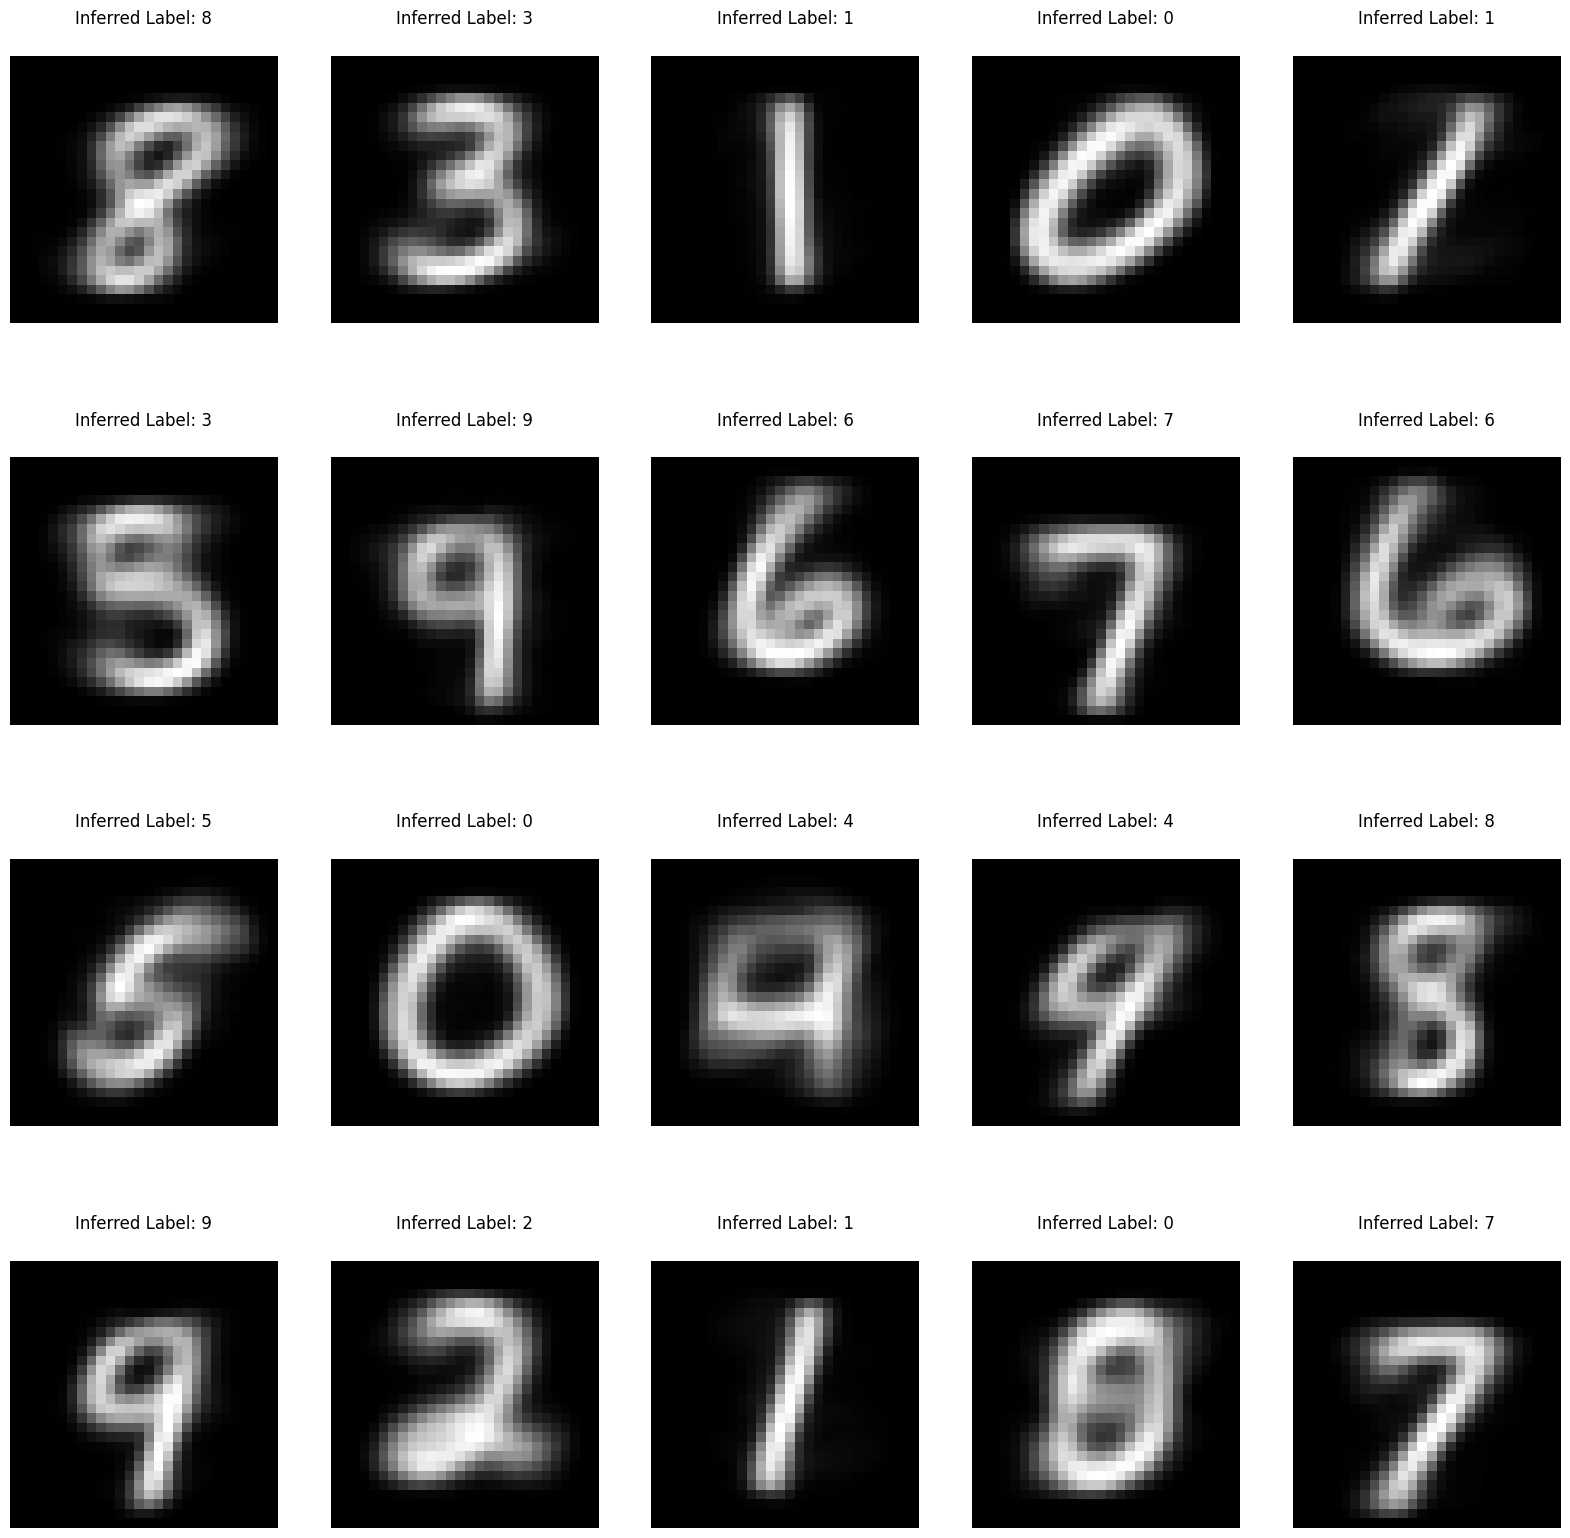

In [ ]:
centroids = k_means.cluster_centers_
centroids *= 255
centroids = centroids.reshape(20, 28, 28)
centroids = centroids.astype(np.uint8)

fig, axs = plt.subplots(4, 5, figsize = (20, 20))
plt.gray()

for i, ax in enumerate(axs.flat):
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('Inferred Label: {}'.format(key))
    ax.matshow(centroids[i])
    ax.axis('off')
fig.show()

# KNN

(1) With PCA

In [ ]:
k_vals = range(1,50, 5)
accuracy_pca = []
for k in k_vals:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train_pca, y_train)
  score_pca = knn.score(X_test_pca, y_test)
  accuracy_pca.append(score_pca)

(2) Without PCA

In [ ]:
accuracy_wt_pca = []
for k in k_vals:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  score_wt_pca = knn.score(X_test, y_test)
  accuracy_wt_pca.append(score_wt_pca)

In [ ]:
plt.plot(range(1, 50, 5), accuracy_pca, color ='g', linewidth ='3')
plt.plot(range(1, 50, 5), accuracy_wt_pca, color ='b', linewidth ='3')

plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()